In [16]:
%run eda.ipynb

Categorical Columns: ['brand', 'name', 'processor', 'CPU', 'Ram_type', 'ROM_type', 'GPU', 'OS']
Numeric Columns: ['spec_rating', 'Ram', 'ROM', 'display_size', 'resolution_width', 'resolution_height', 'warranty']
Training set: (714, 15)  Test set: (179, 15)


In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np

In [4]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(random_state=42),
    "GradientBoosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, objective="reg:squarederror")
}

In [17]:
cv_results = {}
for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="r2")
    cv_results[name] = np.mean(scores)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1326836529.33106, tolerance: 205962434.62448552
  model = cd_fast.sparse_enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1075550461.2511384, tolerance: 227864703.70032576
  model = cd_fast.sparse_enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3548846072.742561, tolerance: 211166958.69599336
  model = cd_fast.sparse_enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.p

In [18]:
cv_results = {}
for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="r2")
    cv_results[name] = np.mean(scores)
    print(f"{name} → CV R²: {round(np.mean(scores), 4)}")

LinearRegression → CV R²: 0.7468
Ridge → CV R²: 0.7786


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1326836529.33106, tolerance: 205962434.62448552
  model = cd_fast.sparse_enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1075550461.2511384, tolerance: 227864703.70032576
  model = cd_fast.sparse_enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3548846072.742561, tolerance: 211166958.69599336
  model = cd_fast.sparse_enet_coordinate_descent(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.p

Lasso → CV R²: 0.7484
RandomForest → CV R²: 0.7309
GradientBoosting → CV R²: 0.7145
XGBoost → CV R²: 0.6925


Hyperparameter Tuning

In [19]:
best_models = {}


In [27]:
param_grids = {
    "LinearRegression": {},
    
    "Ridge": {
        "model__alpha": [0.1, 1, 10, 50, 100, 200]
    },
    
    "Lasso": {
        "model__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10],
        "model__max_iter": [5000, 10000]
    },
    
    "RandomForest": {
        "model__n_estimators": [100, 200, 300],
        "model__max_depth": [None, 10, 20, 30],
        "model__min_samples_split": [2, 5, 10]
    },
    
    "GradientBoosting": {
        "model__n_estimators": [100, 200, 300],
        "model__learning_rate": [0.01, 0.05, 0.1],
        "model__max_depth": [3, 5, 7]
    },
    
    "XGBoost": {
        "model__n_estimators": [100, 200, 300],
        "model__learning_rate": [0.01, 0.05, 0.1],
        "model__max_depth": [3, 5, 7]
    }
}

In [33]:
for name, model in models.items():
    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("model", model)])
    
    grid = GridSearchCV(pipe,
                        param_grids[name],
                        cv=10,
                        scoring="r2",
                        n_jobs=-1)
    
    grid.fit(X_train, y_train)
    
    best_models[name] = grid

    print(f"{name} → Best CV R²: {grid.best_score_:.4f}")
    print(f"{name} → Best Params: {grid.best_params_}\n")
    

LinearRegression → Best CV R²: 0.7773
LinearRegression → Best Params: {}

Ridge → Best CV R²: 0.7942
Ridge → Best Params: {'model__alpha': 1}



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 619982394.671324, tolerance: 269138533.77964777
  model = cd_fast.sparse_enet_coordinate_descent(


Lasso → Best CV R²: 0.7719
Lasso → Best Params: {'model__alpha': 0.1, 'model__max_iter': 10000}

RandomForest → Best CV R²: 0.7530
RandomForest → Best Params: {'model__max_depth': 20, 'model__min_samples_split': 2, 'model__n_estimators': 200}

GradientBoosting → Best CV R²: 0.7556
GradientBoosting → Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 300}

XGBoost → Best CV R²: 0.7520
XGBoost → Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 300}



In [34]:
for name, grid in best_models.items():
    print(f"{name} Best Params: {grid.best_params_}")
    print(f"{name} Best CV R²: {grid.best_score_:.4f}")

final_model = max(best_models.items(), key=lambda x: x[1].best_score_)[1].best_estimator_
print("\n✅ Final Best Model Selected:", final_model)

RandomForest Best Params: {'model__max_depth': 20, 'model__min_samples_split': 2, 'model__n_estimators': 200}
RandomForest Best CV R²: 0.7530
GradientBoosting Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 300}
GradientBoosting Best CV R²: 0.7556
XGBoost Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 300}
XGBoost Best CV R²: 0.7520
LinearRegression Best Params: {}
LinearRegression Best CV R²: 0.7773
Ridge Best Params: {'model__alpha': 1}
Ridge Best CV R²: 0.7942
Lasso Best Params: {'model__alpha': 0.1, 'model__max_iter': 10000}
Lasso Best CV R²: 0.7719

✅ Final Best Model Selected: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['spec_rating', 'Ram', 'ROM',
                                                   'display_size',
                                                   'resolution_width',
 

Save model

In [35]:
import pickle
from sklearn.linear_model import Ridge

In [36]:
final_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", Ridge(alpha=1))
])

In [37]:
final_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['spec_rating', 'Ram', 'ROM',
                                                   'display_size',
                                                   'resolution_width',
                                                   'resolution_height',
                                                   'warranty']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['brand', 'name', 'processor',
                                                   'CPU', 'Ram_type',
                                                   'ROM_type', 'GPU',
                                                   'OS'])])),
                ('model', Ridge(alpha=1))])

In [38]:
train_score = final_model.score(X_train, y_train)
test_score = final_model.score(X_test, y_test)

In [39]:
print(f"Train R²: {train_score:.4f}")
print(f"Test R²: {test_score:.4f}")

Train R²: 0.9787
Test R²: 0.8461


In [40]:
with open("laptop_price_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

In [47]:
mean_absolute_error = np.mean(np.abs(y_test - final_model.predict(X_test)))
print(f"Mean Absolute Error: {mean_absolute_error:.2f}")

mean_squared_error = np.mean((y_test - final_model.predict(X_test))**2)
rmse = np.sqrt(mean_squared_error)
print(f"Mean Squared Error: {mean_squared_error:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

Mean Absolute Error: 15065.03
Mean Squared Error: 527216606.19
Root Mean Squared Error: 22961.20


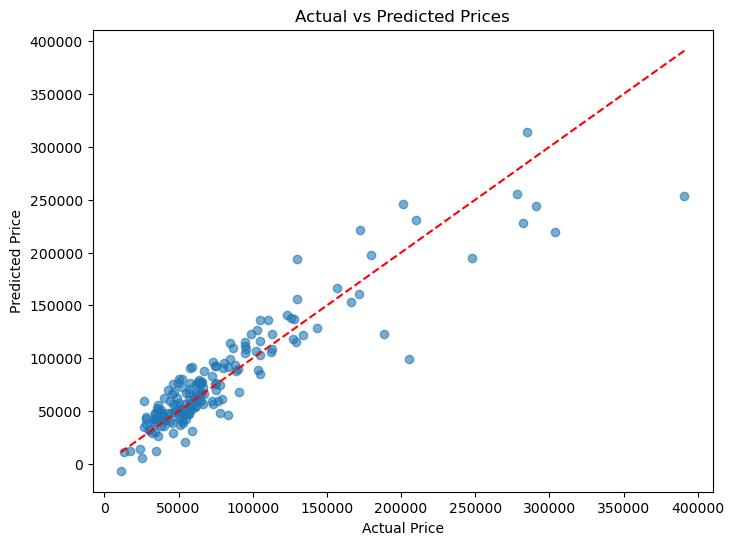

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, final_model.predict(X_test), alpha=0.6)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.show()

NameError: name 'y_pred' is not defined

<Figure size 800x600 with 0 Axes>